In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#load dataset
data = pd.read_excel('AmazonSalesData_Cleaned.xlsx')

In [49]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,438.82,337.56,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [50]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [51]:
#convert order date to date time
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [52]:
#Extract month and year from order date
data["Year"]= data["Order Date"].dt.year  
data["Month"]= data["Order Date"].dt.month
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,438.82,337.56,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [53]:
#Calculate the Number of Regions
regions = data["Region"].nunique()
print("Number of Regions:", regions)

Number of Regions: 7


In [54]:
#Calculate the Number of Countries
country = data["Country"].nunique()
print("Number of Countries:", country)

Number of Countries: 76


In [57]:
# Calculate the Item Types
item_type = data["Item Type"].nunique()
print("Number of Item Types:", item_type)

Number of Item Types: 12


In [58]:
# Calculate the Total Unit Sold
unit_sold = data["Units Sold"].sum()
print("Total Unit Sold:", unit_sold)

Total Unit Sold: 512871


In [59]:
# Calculate the Total Unit Cost
unit_cost = data["Unit Cost"].sum()
print("Total Unit cost:", unit_cost)

Total Unit cost: 22411.2


In [60]:
# Calculate the Total Revenue
total_revenue = data["Total Revenue"].sum()
print("Total Revenue: $", total_revenue)

Total Revenue: $ 137348768.31


In [61]:
# Calculate the Total Cost
total_cost = data["Total Cost"].sum()
total_cost = round(total_cost,2)
print("Total Cost: $", total_cost)

Total Cost: $ 93180569.91


In [62]:
# Calculate the Total Profit
total_profit = data["Total Profit"].sum()
total_profit = round(total_profit, 2)
print("Total Profit: $", total_profit)

Total Profit: $ 44168198.4


In [65]:
# Calculate Total Profit Grouped by Region and Sales Channel
profit_by_region_channel = data.groupby(['Region', 'Sales Channel'])['Total Profit'].sum()
print(profit_by_region_channel) 

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64


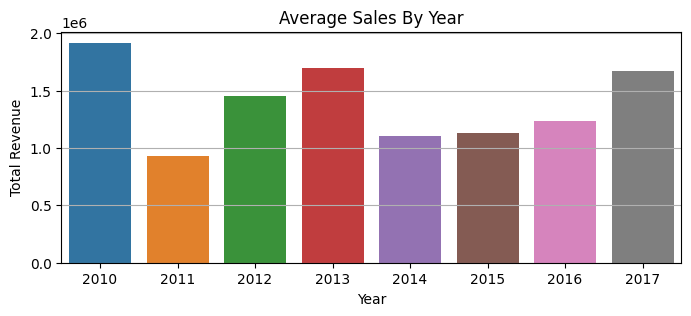

In [84]:
#year wise sales
year_sales = data.groupby('Year')['Total Revenue'].mean()

plt.figure(figsize=(8,3))
sns.barplot(x=year_sales.index, y=year_sales.values)
plt.grid(axis='y') # adding a grid along the y-axis

plt.title('Average Sales By Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

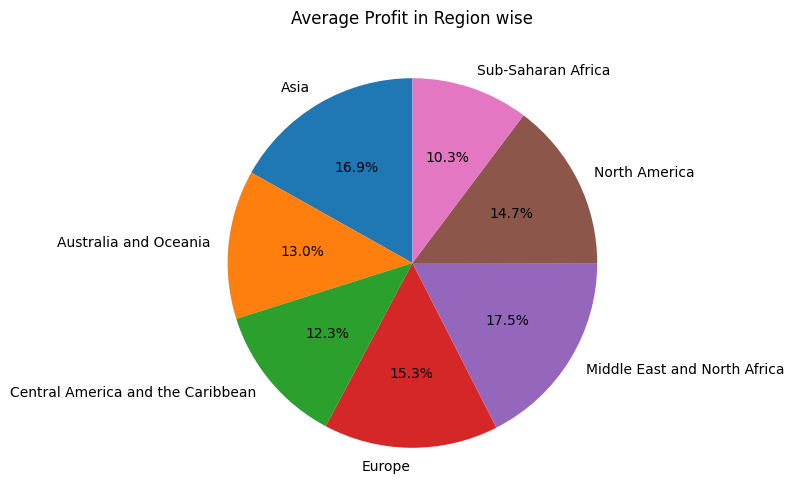

In [67]:
# Pie chart of Total Profit in region wise
plt.figure(figsize=(6, 6))

region_TotalRevenue = data.groupby('Region')['Total Profit'].mean()
plt.pie(region_TotalRevenue, startangle=90, labels=region_TotalRevenue.index, autopct='%1.1f%%')

plt.title('Average Profit in Region wise')
plt.show()  # Add this line to display the plot

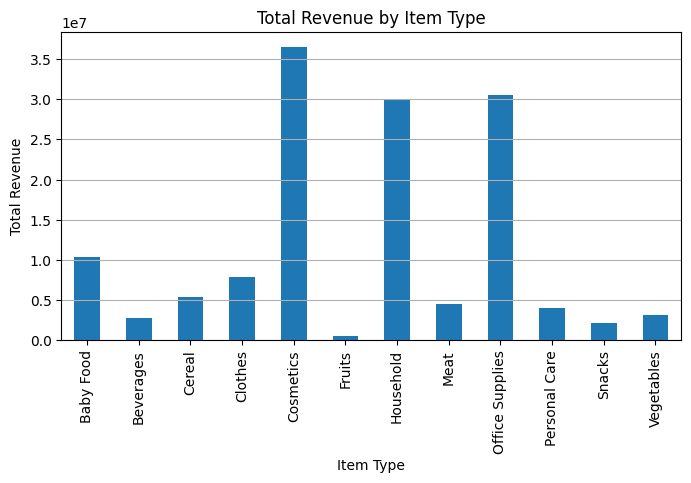

In [75]:
#Group Total Revenue by Item type
TotalRevenue_ItemType = data.groupby('Item Type') ['Total Revenue'].sum()

#bar chart for Total Revenue by Item type
plt.figure(figsize=(8,4))
TotalRevenue_ItemType.plot(kind='bar')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Item Type')
plt.grid(axis='y')
plt.show()

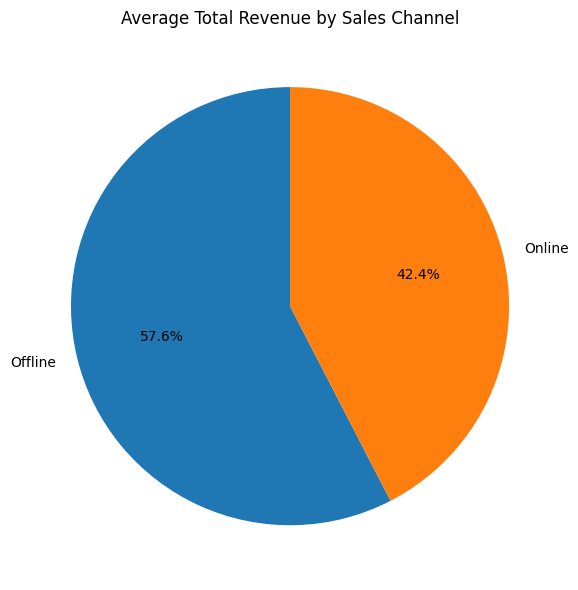

In [76]:
# Group Total Revenue by Sales Channel and calculate the mean
TotalRevenue_by_SalesChannel = data.groupby('Sales Channel')['Total Revenue'].mean()

# Create Pie Chart for Total Revenue by Sales Channel
plt.figure(figsize=(6, 6))
plt.pie(TotalRevenue_by_SalesChannel, labels=TotalRevenue_by_SalesChannel.index, autopct='%1.1f%%', startangle=90)
plt.title('Average Total Revenue by Sales Channel')  # Corrected title
plt.tight_layout()
plt.show()

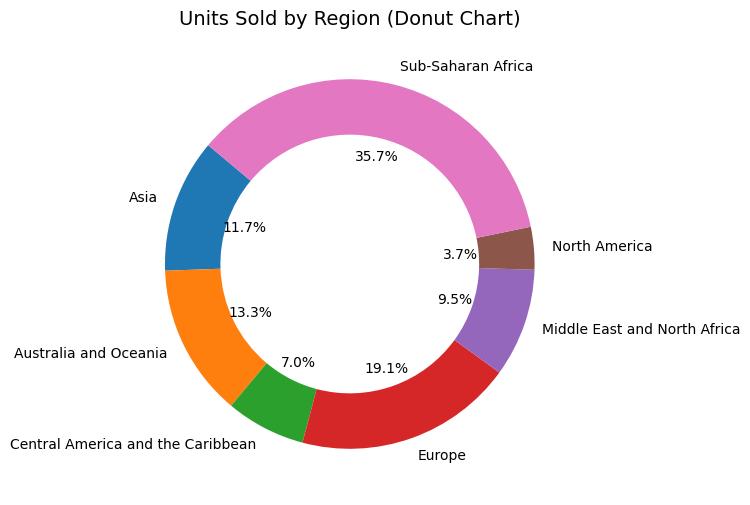

In [77]:
# Create a Donut Chart of Units Sold by Region
Region_UnitSold = data.groupby('Region')['Units Sold'].sum()

plt.figure(figsize=(8, 6))  # Slightly larger for better visibility
plt.pie(Region_UnitSold, labels=Region_UnitSold.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))  # Donut chart

plt.title('Units Sold by Region (Donut Chart)', fontsize=14)  # Clearer title
plt.show()

In [85]:
#group unit sold by year

UnitSold_YearMonth= data.groupby(['Year'])['Units Sold'].sum()

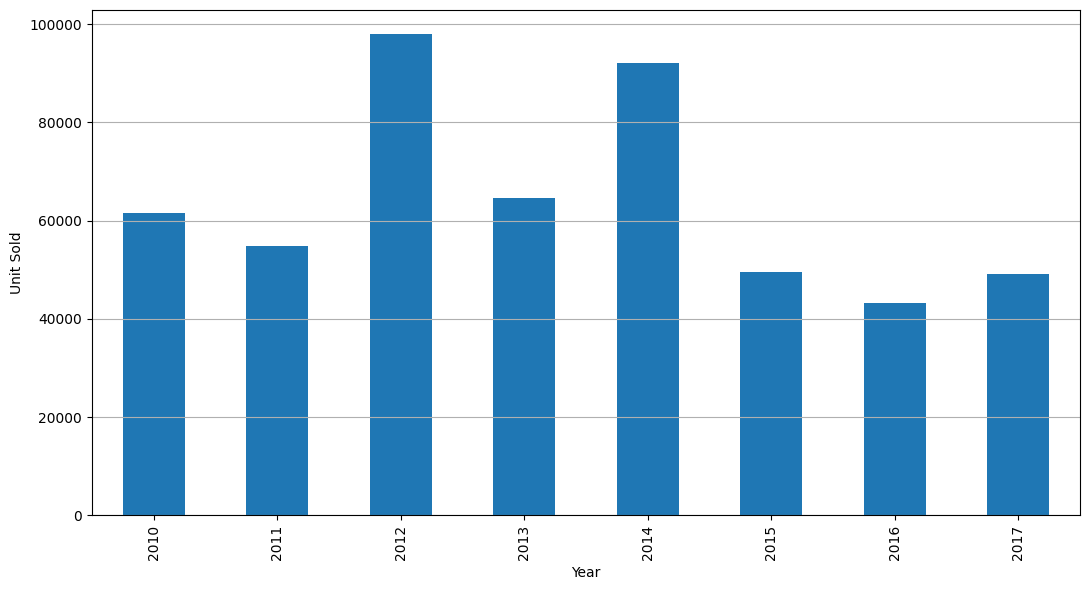

In [86]:
#create a bar chart for unit sold by year and month
plt.figure(figsize=(11,6))
UnitSold_YearMonth.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Unit Sold')
plt.tight_layout()
plt.grid(axis='y')

In [87]:
#group total cost by sales chanel
TotalCost_SalesChannel= data.groupby('Sales Channel')['Total Cost'].sum()

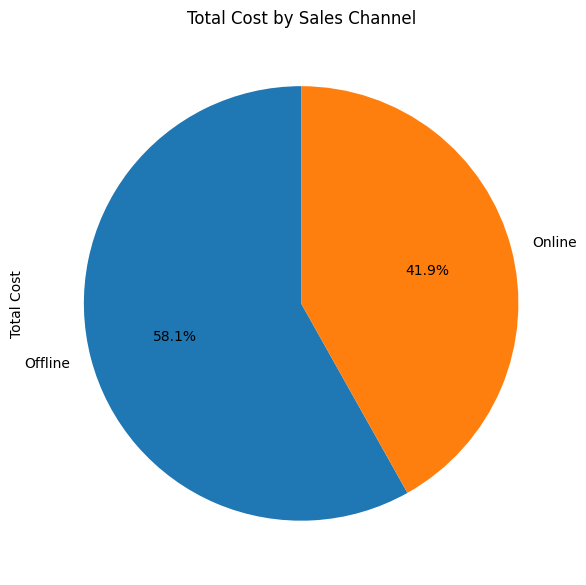

In [88]:
#pie chart for total cost by sales channel
plt.figure(figsize=(6,6))
TotalCost_SalesChannel.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Total Cost by Sales Channel')
plt.tight_layout()

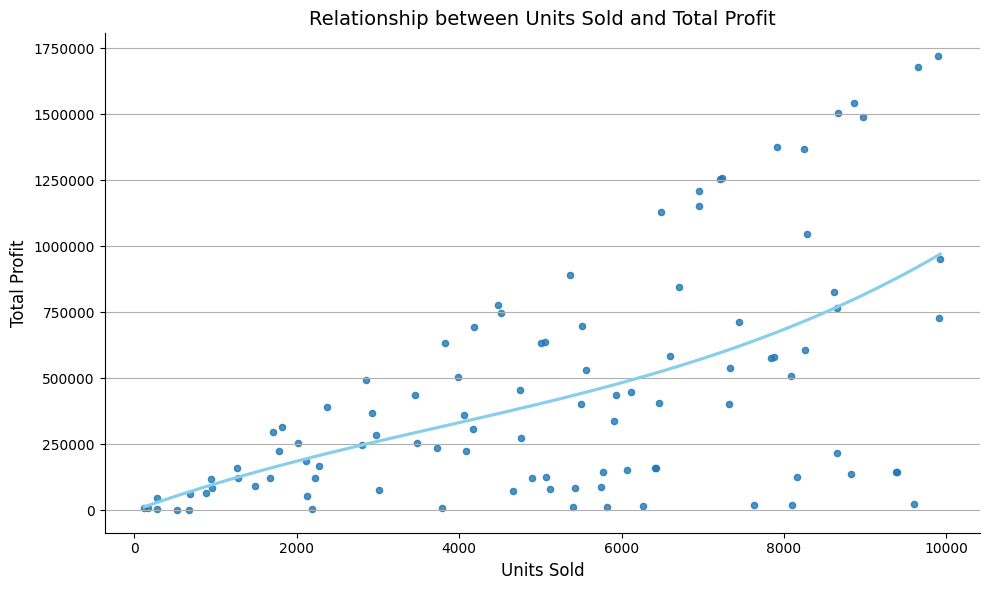

In [95]:
# df has columns 'Units Sold' and 'Total Profit'

# Plotting
plt.figure(figsize=(10, 6))  # Adjust size as needed

# Scatter Plot with Seaborn
sns.regplot(x='Units Sold', y='Total Profit',data=data, ci=0, order=3,scatter_kws={'s': 20}, line_kws={'color':'skyblue'})  # ci=None

# Customization (replicate the dark theme)
plt.title('Relationship between Units Sold and Total Profit', fontsize=14)
plt.xlabel('Units Sold', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.grid(axis='y')  # Add horizontal gridlines

# Tick Formatting (adjust if your profit values are different)
plt.ticklabel_format(style='plain', axis='y')  # Avoid scientific notation for y-axis

# Remove top and right spines for a cleaner look
sns.despine()


# Show the plot
plt.tight_layout()
plt.show()

In [96]:
# Assuming your DataFrame is named 'df' and has columns 'Total Profit' and 'Total Revenue'
Profit_Margin = (data['Total Profit'] / data['Total Revenue']) * 100 

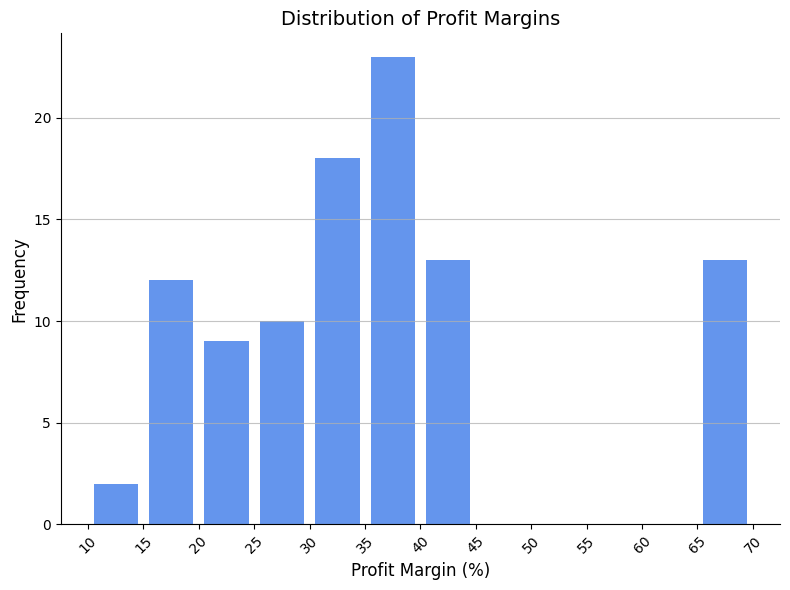

In [97]:
plt.figure(figsize=(8, 6))  # Adjust the size as needed

# Histogram
plt.hist(Profit_Margin, bins=range(10, 71, 5), rwidth=0.8, color='cornflowerblue') 

# Customization
plt.title('Distribution of Profit Margins', fontsize=14)
plt.xlabel('Profit Margin (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(10, 71, 5), rotation=45)
plt.grid(axis='y', alpha=0.75)  # Show only horizontal gridlines with transparency

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()